In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)   

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [23]:
print(df.isnull().sum())
df = df.dropna(subset=['Year'])
df['Publisher'] = df['Publisher'].fillna('Unknown')
print(df.isnull().sum())


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [24]:
df['Year'] = df['Year'].astype(int)

In [25]:
print(df.head())

   Rank                      Name Platform  Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


In [31]:
df_genre = df.groupby('Genre')
genre_sales = df_genre["Global_Sales"].sum().sort_values(ascending=False)
print(genre_sales)

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64


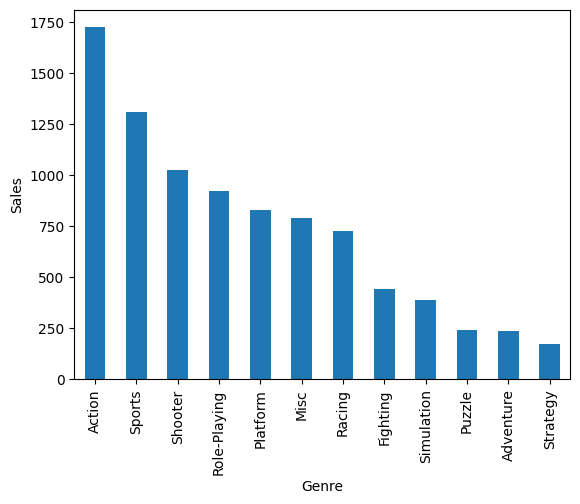

In [34]:
genre_sales.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.savefig('genre_sales.png')

In [8]:
df = df[df['Year'] < 2000]
print(df)

        Rank                           Name Platform  Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
1          2              Super Mario Bros.      NES  1985      Platform            Nintendo     29.08      3.58      6.81         0.77         40.24
4          5       Pokemon Red/Pokemon Blue       GB  1996  Role-Playing            Nintendo     11.27      8.89     10.22         1.00         31.37
5          6                         Tetris       GB  1989        Puzzle            Nintendo     23.20      2.26      4.22         0.58         30.26
9         10                      Duck Hunt      NES  1984       Shooter            Nintendo     26.93      0.63      0.28         0.47         28.31
12        13    Pokemon Gold/Pokemon Silver       GB  1999  Role-Playing            Nintendo      9.00      6.18      7.20         0.71         23.10
...      ...                            ...      ...   ...           ...                 ...       .